In [7]:
import pangolin as pg

Question 1

In [3]:
from scipy.stats import norm

In [6]:
x = [1, 2, 3, 4, 5, 6]
y = [0, 1.5, 1.0, 0.5, 1.2, 2.5]
slopes_values = [0, 0.25, 0.5, 0.75, 1]

def Probability_Y_Given_S(slope_value, x, y):
    y_equation = slope_value * x
    prob_y = norm.pdf(y, loc=y_equation, scale=1)
    return prob_y

probs_of_all_s = [1 for _ in range(len(slopes_values))]
for i, s in enumerate(slopes_values):
    for j in range(len(x)):
        cur_x, cur_y = x[j], y[j]
        prob_y_given_s = Probability_Y_Given_S(s, cur_x, cur_y)
        probs_of_all_s[i] *= prob_y_given_s

posterior = [.2 * p for p in probs_of_all_s]
sm = sum(posterior)
normal_posterior = [p / sm for p in posterior]
normal_posterior


[0.009456905156440607,
 0.7751024227873098,
 0.21523816927002018,
 0.00020250214073843964,
 6.454908376547967e-10]

In [4]:
import matplotlib.pyplot as plt

Question 2

In [6]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]

w = pg.categorical([.2,.2,.2,.2,.2])
s_values = pg.makerv([0, 0.25, 0.5, 0.75, 1])
s_floats = [0, 0.25, 0.5, 0.75, 1]
noise = pg.normal(0, 1)

#outputs[i] = inputs[i] * s_values[w] + noise

#y = [[v * x for v in s_values] for x in input]
y = [pg.normal(s_values[w] * x, 1) for x in inputs]


# y
w_samples, n_samples = pg.sample((w, noise), y, outputs)
w_samples = [.25 * w for w in w_samples]

probs = [0 for i in range(len(s_values))]
for j, s in enumerate(w_samples):
    for i, sval in enumerate(s_floats):
        if s == sval:
            probs[i] += 1

probs = [p / len(w_samples) for p in probs]

posterior = [p * .2 for p in probs]

s = sum(posterior)
normal_posterior = [p / s for p in posterior]
normal_posterior


[0.010299999999999998,
 0.7709999999999999,
 0.21849999999999997,
 0.00019999999999999998,
 0.0]

Question 3

[0.0203, 0.1087, 0.2952, 0.353, 0.1803, 0.0391, 0.0033, 0.0001, 0.0, 0.0]

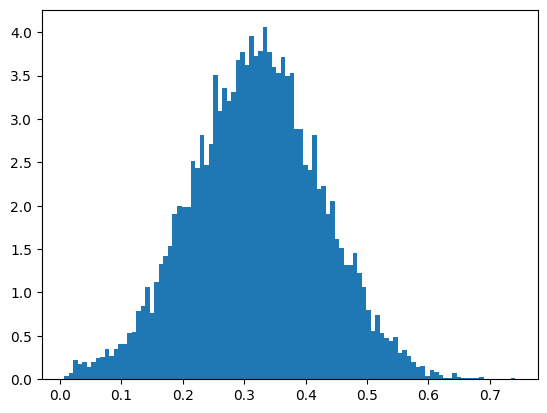

In [21]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]


s = pg.uniform(0, 1)
s_floats = [i * .1 for i in range(0, 10)]
noise = pg.normal(0, 1)

#outputs[i] = inputs[i] * s_values[w] + noise

#y = [[v * x for v in s_values] for x in input]
y = [pg.normal(s * x, 1) for x in inputs]


# y
s_samples, n_samples = pg.sample((s, noise), y, outputs)
plt.hist(s_samples, density=True, bins=100)

# probs = [0 for i in range(len(s_floats))]
# for j, s in enumerate(s_samples):
#     for i, sval in enumerate(s_floats):
#         if s < sval + .1 and s >= sval:
#             probs[i] += 1

# probs = [p / len(s_samples) for p in probs]

# posterior = [p * .1 for p in probs]

# s = sum(posterior)
# normal_posterior = [p / s for p in posterior]
# normal_posterior

Question 4

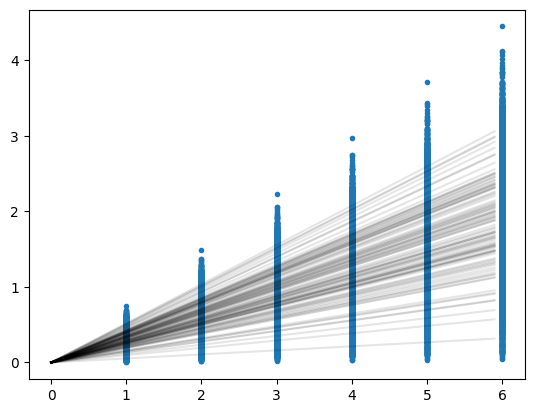

In [22]:
import numpy as np

x,y = [x for s in s_samples for x in inputs], [s * x for s in s_samples for x in inputs]

plt.plot(x,y,'.')
for s in s_samples[::100]:
    xs = np.arange(0,6,.1)
    plt.plot(xs, s*xs,'k-',alpha=0.1)

Question 5

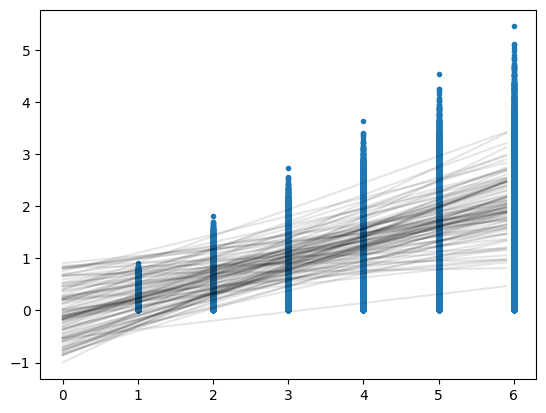

In [69]:
inputs = [1, 2, 3, 4, 5, 6]
outputs = [0, 1.5, 1.0, 0.5, 1.2, 2.5]


s = pg.uniform(0, 1)
s_floats = [0, 0.25, 0.5, 0.75, 1]
noise = pg.normal(0, 1)
bias = pg.uniform(-1,1)
#outputs[i] = inputs[i] * s_values[w] + noise

#y = [[v * x for v in s_values] for x in input]
y = [pg.normal(bias + s * x, 1) for x in inputs]


# y
s_samples, n_samples, bias_samples = pg.sample((s, noise, bias), y, outputs)
# plt.hist(s_samples, density=True, bins=100)
# plt.hist(bias_samples, density=True, bins=100)
probs = [0 for i in range(len(s_floats))]
for j, s in enumerate(s_samples):
    for i, sval in enumerate(s_floats):
        if s <= sval + .25 and s >= sval:
            probs[i] += 1

probs = [p / len(s_samples) for p in probs]

posterior = [p * .2 for p in probs]

s = sum(posterior)
normal_posterior = [p / s for p in posterior]
normal_posterior

x,y = [x for s in s_samples for x in inputs], [s * x for s in s_samples for x in inputs]
plt.plot(x,y,'.')
for (b, s) in zip(bias_samples[::100], s_samples[::100]):
    xs = np.arange(0,6,.1)
    plt.plot(xs, b + s*xs,'k-',alpha=0.1)


Question 6

In [74]:
import numpy as np
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
y = y - np.mean(y)
y = y / np.std(y)

X_train = X[1::2]
X_test = X[::2]
y_train = y[1::2]
y_test = y[::2]


num_train, num_features = X_train.shape
num_test = X_test.shape[0]

X_train = pg.makerv(X_train)

# w = [pg.normal(0, 10) for _ in range(num_features)]
# dist_y_train = []


# for i in range(len(X_train)):
#     print(i)
#     x = X_train[i]
#     y = pg.normal(w @ x, 1)
#     dist_y_train.append(y)
#dist_y_train = [pg.normal(w @ X_train[i], 1) for i in range(len(X_train))]
dist_y_train = pg.slot()
w = pg.slot()
with pg.Loop(num_features) as i:
    w[i] = pg.normal(0, 10)

with pg.Loop(len(X_train)) as j:
    x = X_train[j]
    dist_y_train[j] = pg.normal(w @ x, 1)

dist_y_test = [pg.normal(w @ X_test[i], 1) for i in range(len(X_test))]

# dist_y_test = pg.slot()
# with pg.Loop(len(X_test)) as i:
#     px= X_test[i]
#     dist_y_test[i] = pg.normal(w @ x, 1)

# for i in range(len(X_test)):
#     x = X_test[i]
#     y = pg.normal(w @ x, 1)
#     dist_y_test.append(y)
e = pg.E(dist_y_test, dist_y_train, y_train)
# e
print(e)
print(np.mean(e))
w_samples = pg.sample((dist_y_test), dist_y_train, [y for y in y_train], niter=100)
print(np.mean(w_samples))
# w_samples

#Make a scatter-plot of your predictions and the true values, with the true values on the x-axis, and the predictions on the y-axis
# plt.scatter(y_test, w_samples)
# plt.scatter(x[:,0], x[:,1], c=w_samples)


[Array(0.61321455, dtype=float32), Array(0.22995073, dtype=float32), Array(-0.29328907, dtype=float32), Array(-0.9785056, dtype=float32), Array(0.07383692, dtype=float32), Array(-0.49701542, dtype=float32), Array(-0.41079578, dtype=float32), Array(-0.6162691, dtype=float32), Array(0.81109, dtype=float32), Array(0.01568647, dtype=float32), Array(-0.2664432, dtype=float32), Array(-0.38625097, dtype=float32), Array(0.15731654, dtype=float32), Array(-0.5333212, dtype=float32), Array(-0.15781458, dtype=float32), Array(0.16189781, dtype=float32), Array(1.1001145, dtype=float32), Array(-0.80657536, dtype=float32), Array(0.77798784, dtype=float32), Array(0.9478179, dtype=float32), Array(-0.03391642, dtype=float32), Array(-0.17491117, dtype=float32), Array(0.6913272, dtype=float32), Array(-0.05717326, dtype=float32), Array(-1.0019422, dtype=float32), Array(0.19076562, dtype=float32), Array(-0.22036932, dtype=float32), Array(-0.08926004, dtype=float32), Array(0.7525947, dtype=float32), Array(-0.

(221,)
(221, 10)
(221,)


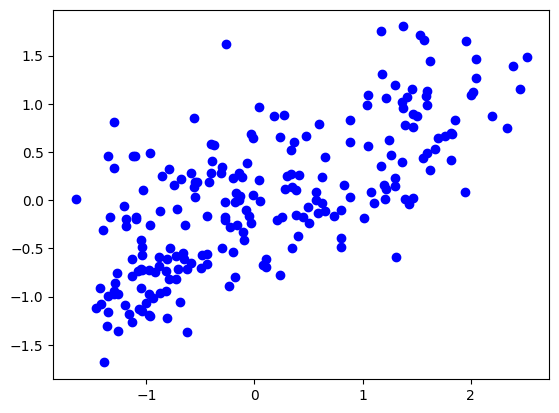

In [75]:
import matplotlib.pyplot as plt
X_test = np.array(X_test)
w_samples =np.array([np.median(row) for row in w_samples])
y_test = np.array(y_test)
print(w_samples.shape)
print(X_test.shape)
print(y_test.shape)
plt.scatter(y_test, w_samples, color='blue')  

In [77]:
# calculate mean squared difference
sq_diff = (w_samples - y_test) ** 2
mean_sq_diff = np.mean(sq_diff)
mean_sq_diff

0.5642710150367617

Question 7

In [79]:
from sklearn.datasets import load_breast_cancer
X,y = load_breast_cancer(return_X_y=True)

X_train = X[1::2]
X_test = X[::2]
y_train = y[1::2]
y_test = y[::2]

num_train, num_features = X_train.shape
num_test = X_test.shape[0]

X_train = pg.makerv(X_train)

# w = [pg.normal(0, 10) for _ in range(num_features)]
# dist_y_train = []


# for i in range(len(X_train)):
#     print(i)
#     x = X_train[i]
#     y = pg.normal(w @ x, 1)
#     dist_y_train.append(y)
#dist_y_train = [pg.normal(w @ X_train[i], 1) for i in range(len(X_train))]
dist_y_train = pg.slot()
w = pg.slot()
with pg.Loop(num_features) as i:
    w[i] = pg.normal(0, 10)

with pg.Loop(len(X_train)) as j:
    x = X_train[j]
    dist_y_train[j] = pg.bernoulli(pg.sigmoid(w @ x))

# dist_y_test = [pg.bernoulli(pg.sigmoid(w @ X_test[i])) for i in range(len(X_test))]

# dist_y_test = pg.slot()
# with pg.Loop(len(X_test)) as i:
#     px= X_test[i]
#     dist_y_test[i] = pg.normal(w @ x, 1)

# for i in range(len(X_test)):
#     x = X_test[i]
#     y = pg.normal(w @ x, 1)
#     dist_y_test.append(y)
# e = pg.E(dist_y_test, dist_y_train, y_train)

e = [pg.E(pg.sigmoid(w @ X_test[i]), dist_y_train, y_train) for i in range(len(X_test))]
# e
print(e)
print(np.mean(e))
w_samples = pg.sample((dist_y_test), dist_y_train, [y for y in y_train], niter=100)
print(np.mean(w_samples))
# w_samples

#Make a scatter-plot of your predictions and the true values, with the true values on the x-axis, and the predictions on the y-axis
# plt.scatter(y_test, w_samples)
# plt.scatter(x[:,0], x[:,1], c=w_samples)

here


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
X_test = np.array(X_test)
w_samples =np.array([np.median(row) for row in w_samples])
y_test = np.array(y_test)
print(w_samples.shape)
print(X_test.shape)
print(y_test.shape)
plt.scatter(y_test, w_samples, color='blue') 